In [1]:
import numpy as np
import pandas as pd
import os
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

torch.Size([3, 208, 176])


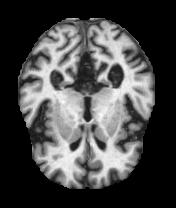

In [3]:
img = open_image(Path('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem107.jpg'))
print(img.shape)
img

torch.Size([3, 208, 176])


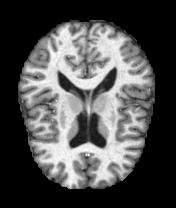

In [5]:
img = open_image(Path('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem1005.jpg'))
print(img.shape)
img

torch.Size([3, 208, 176])


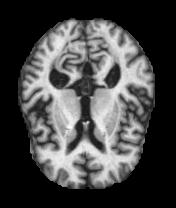

In [6]:
img = open_image(Path('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/moderateDem17.jpg'))
print(img.shape)
img

torch.Size([3, 208, 176])


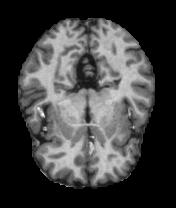

In [7]:
img = open_image(Path('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1.jpg'))
print(img.shape)
img

In [8]:


PATH = Path('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/')



In [10]:
transform = get_transforms(max_rotate=7.5, max_zoom=1.15, max_lighting=0.15, max_warp=0.15, p_affine=0.8, p_lighting = 0.8, 
                           xtra_tfms= [pad(mode='zeros'), symmetric_warp(magnitude=(-0.1,0.1)), cutout(n_holes=(1,3), length=(5,5))])

Shrinking the image size to 112x112.

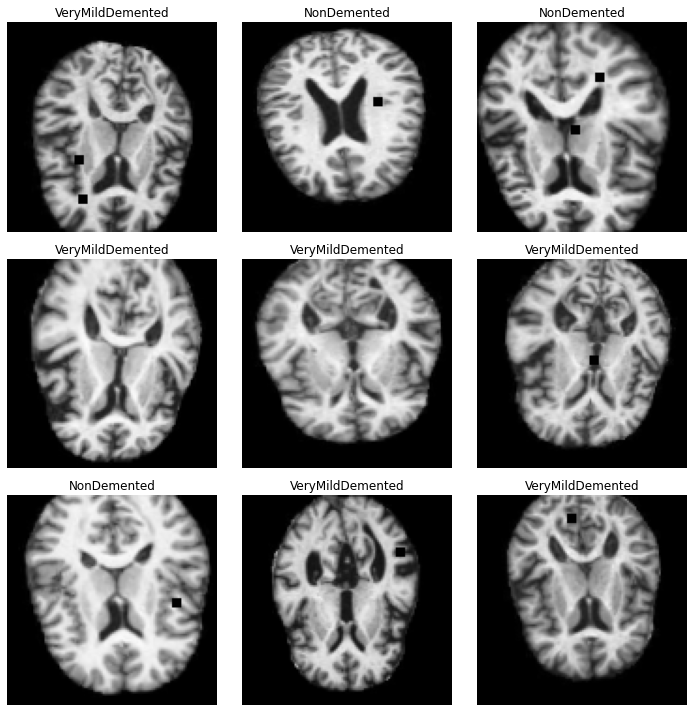

In [11]:
data = ImageDataBunch.from_folder(PATH, train="train/",
                                  test="test/",
                                  valid_pct=.4,
                                  ds_tfms=transform,
                                  size=112,bs=32, 
                                  ).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(10,10))


Counting the number of images per class. (Given in the fast.ai document)

In [12]:
Category.__eq__ = lambda self, that: self.data == that.data
Category.__hash__ = lambda self: hash(self.obj)
Counter(data.train_ds.y)

Counter({Category NonDemented: 1542,
         Category MildDemented: 417,
         Category VeryMildDemented: 1082,
         Category ModerateDemented: 32})

 Downloading a pretrained model of VGG19.

In [17]:
learn = cnn_learner(data, models.vgg19_bn, metrics=accuracy, wd=1e-1)#,pretrained=False)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.047447,1.441637,0.438965,12:04
1,1.580709,1.085350,0.530762,12:15
2,1.184941,0.947951,0.555664,12:28
3,1.019395,0.850452,0.597168,12:36
4,0.972901,0.870494,0.581055,12:22
5,0.943410,0.839950,0.612793,12:22
6,0.899984,0.811007,0.627930,12:21
7,0.861629,0.792800,0.626465,12:32
8,0.823174,0.780296,0.634277,12:30
9,0.814264,0.780286,0.637695,12:23
